In [1]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

In [2]:
# Test
record = wfdb.rdrecord('neurological_status/Subject1_SpO2HR')
print(record.p_signal[:,1].shape, record.sig_len, record.units[1])

(2299,) 2299 bpm


In [3]:
measurements = []
for i in range(20):
    filename = 'neurological_status/Subject' + str(i+1) + '_SpO2HR'
    record = wfdb.rdrecord(filename)
    measurements.append(record.sig_len)
min_measurements = min(measurements)

In [4]:
def smoothing(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [5]:
def plot_data(biosensor, smooth=False):
    delay = 60 if smooth else 0
    plt.figure(figsize=(8,4))
    for i in range(20):
        filename = 'neurological_status/Subject' + str(i+1) + '_' + biosensor
        record = wfdb.rdrecord(filename)
        data = record.p_signal[:,1][:min_measurements]
        if (smooth):
            plt.plot(smoothing(data,delay)[delay:-delay], 'g-')
        else:
            plt.plot(data)
    plt.axvline(x = 5*60-delay, color = 'b', label = 'relax')
    plt.axvline(x = 5*60+5*60-delay, color = 'r', label = 'physical stress')
    plt.axvline(x = 5*60+5*60+5*60-delay, color = 'b', label = 'relax')
    plt.axvline(x = 5*60+5*60+5*60+40-delay, color = 'r', label = 'mini-emotional')
    plt.axvline(x = 5*60+5*60+5*60+40+5*60-delay, color = 'r', label = 'cognitive stress')
    plt.axvline(x = 5*60+5*60+5*60+40+5*60+5*60-delay, color = 'b', label = 'relax')
    plt.axvline(x = 5*60+5*60+5*60+40+5*60+5*60+6*60-delay, color = 'r', label = 'emotional stress')
    plt.axvline(x = 5*60+5*60+5*60+40+5*60+5*60+6*60+5*60-delay, color = 'b', label = 'relax')
    plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
    plt.xlabel('seconds')
    plt.ylabel(record.units[1])
    plt.plot()

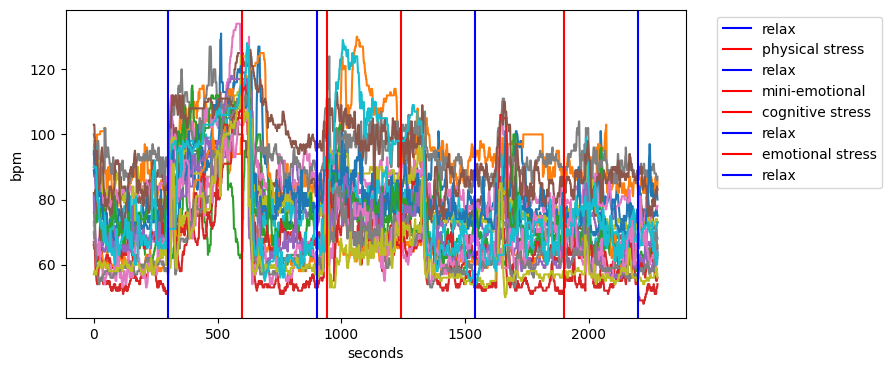

In [6]:
plot_data('SpO2HR')

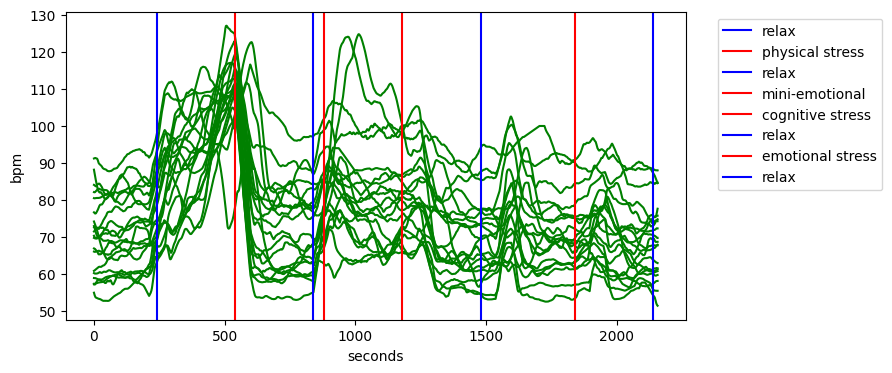

In [7]:
plot_data('SpO2HR', smooth=True)

In [8]:
def obtain_dataset(biosensor, smooth=False):
    delay = 60 if smooth else 0
    dataset = {}
    for i in range(20):
        filename = 'neurological_status/Subject' + str(i+1) + '_' + biosensor
        record = wfdb.rdrecord(filename)
        data = record.p_signal[:,1][:min_measurements]
        if (smooth):
            data = smoothing(data,delay)[delay:-delay]
        dataset['Subject' + str(i+1)] = {'relax':data[:5*60-2*delay],
                                         'cognit':data[15*60+40-delay:20*60+40-delay],
                                         'emotio':data[25*60+40-delay:31*60+40-delay]}
    return dataset

In [9]:
dataset = obtain_dataset('SpO2HR', smooth=True)

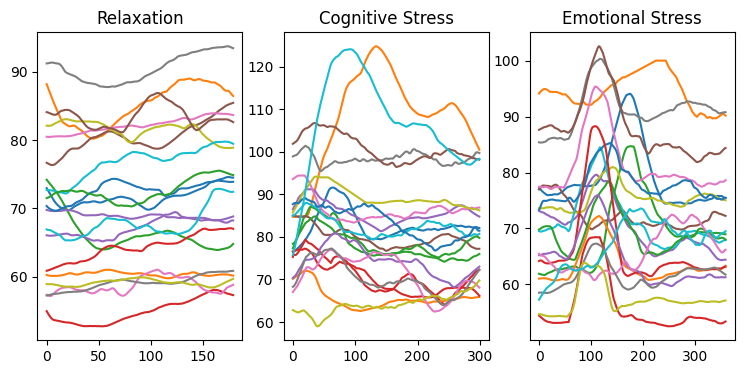

In [10]:
fig = plt.figure(figsize=(9,4))
for k,v in dataset.items():
    plt.subplot(1, 3, 1)
    plt.plot(v['relax'])
    plt.subplot(1, 3, 2)
    plt.plot(v['cognit'])
    plt.subplot(1, 3, 3)
    plt.plot(v['emotio'])
plt.subplot(1, 3, 1)
plt.title('Relaxation')
plt.subplot(1, 3, 2)
plt.title('Cognitive Stress')
plt.subplot(1, 3, 3)
plt.title('Emotional Stress')
plt.tight_layout
plt.show()

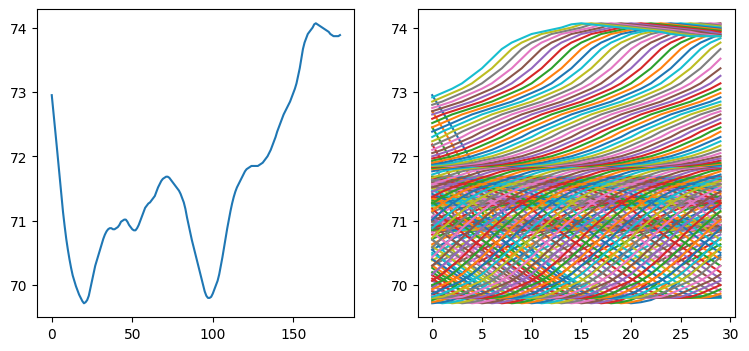

In [11]:
fig = plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
plt.plot(dataset['Subject1']['relax'])

window = 30
dataset_moving = []
for k,v in dataset.items():
    for values in range(len(v['relax'])-window):
        dataset_moving.append(v['relax'][values:values+window])
    break
plt.subplot(1, 2, 2)
for x in dataset_moving:
    plt.plot(x)

In [12]:
window = 30
dataset_extended = {'relax':[], 'cognit':[], 'emotio':[]}
for k,v in dataset.items():
    for variable_name in ['relax', 'cognit', 'emotio']:
        for values in range(len(v[variable_name])-window):
            dataset_extended[variable_name].append(v[variable_name][values:values+window])
            
for k,v in dataset_extended.items():
    print('class {} has {} instances, each a moving window of length {}'.format(k, len(v), len(v[0])))

class relax has 3000 instances, each a moving window of length 30
class cognit has 5400 instances, each a moving window of length 30
class emotio has 6600 instances, each a moving window of length 30


In [13]:
lengths = []
for k,v in dataset_extended.items():
    lengths.append(len(v))
min_length = min(lengths)
print(min_length)

3000


In [18]:
import csv

for k,v in dataset_extended.items():
    random_v = [*range(len(v))]
    np.random.shuffle(random_v)
    
    f = open('training_samples_' + k + '.csv', 'w')
    writer = csv.writer(f)
    for index in random_v[:min_length]:
        writer.writerow(v[index])
    f.close()

In [ ]:
# Test - AccTempEDA
record = wfdb.rdrecord('neurological_status/Subject1_AccTempEDA')
print(record.p_signal[:,].shape, record.sig_len, record.units[:])

(18343, 5) 18343 ['NU', 'NU', 'NU', 'degC', 'NU']
